# CSV to `geoDataFrames`

In [1]:
import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

power_plants = power_plants.drop(columns='Unnamed: 0')

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


Let's use the longitude and latitude columns in the CSV to create a geodataframe.

THese indicate the location of the power plants in the NAD83 CRS (EPSG: 4269).

We can use the `geopandas` function `points_from_xy()`

In [3]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


<Axes: >

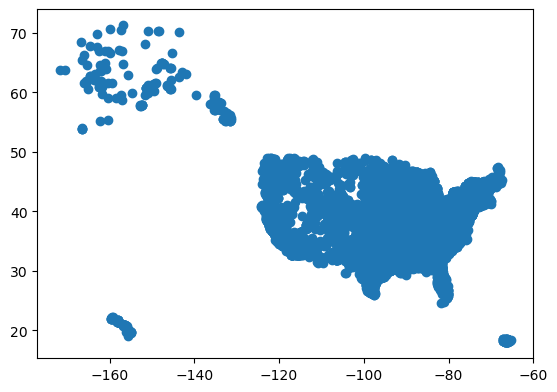

In [4]:
power_plants.plot()

## f-strings

So far, we have printed variables using string concatenation inside the `print()` function: we use commas to separate every variable and string that we want to print. Example:


In [5]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popular way to mix variables and strings in a print statement is by creating a **f-string**, stands for "formatted string".

The simplest syntax:
```python
f"some text {replace}""
```

where `replace` can be a variable, an expression, a function or method call.

In [6]:
# Check what is the ellipsoid

f"ellipsoid: {power_plants.crs.ellipsoid}"

'ellipsoid: GRS 1980'

In [7]:
# Use f-strings inside print() function
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


Advantages of using f-strings: a lot of customization for formatting the output

In [8]:
print(f"{'Is the CRS geographic?:':<25}{power_plants.crs.is_geographic}")

print(f"{'Is the CRS projected?:':<25}{power_plants.crs.is_projected}")

Is the CRS geographic?:  True
Is the CRS projected?:   False


In [9]:
# See where your notebook is located
os.getcwd()

os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'


# Create absolute file path to data
fp = os.path.join('/', 'courses', 'EDS220', 'data', 'tl_2022_us_state', 'tl_2022_us_state.shp')

In [10]:
test = gpd.read_file(fp)

In [11]:
states = gpd.read_file("/courses/EDS220/data/tl_2022_us_state/tl_2022_us_state.shp")

In [12]:
# Simplify column names
states.columns = states.columns.str.lower()
states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


In [13]:
print(states.crs)

GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


<Axes: >

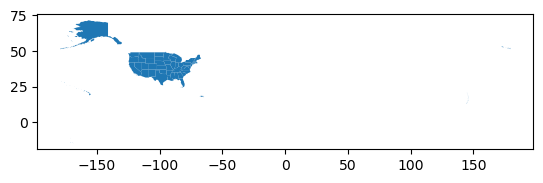

In [14]:
states.plot()

`for` loops

It can be easier to work with the codes as numbers instead of strings. Let's update the corresponding columns in the geodataframe:
`region`, `division`, `statefp`

In [15]:
print(f"region is string dtype? : {is_string_dtype(states['region'])}")
print(f"dvision is string dtype? : {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? : {is_string_dtype(states['statefp'])}")

region is string dtype? : True
dvision is string dtype? : True
statefp is string dtype? : True


This is inconvenient because it repeats the same piece of code, only changing the column name.

Instead, using a `for` loop allows to succinctly print the same info:

In [16]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols:
    print(f"{column} is string dtype? : {is_string_dtype(states[column])}")

region is string dtype? : True
division is string dtype? : True
statefp is string dtype? : True


`for` loops execute a block of code a fixed number of times, iterating over a set of objects. In this case, we iterate over the list of column names.

**dry-code***

DRY = don't repeat yourself is a core programming principle that encourages reducing redundancy and consolidating repeated logix.

If you need to repeat the "same" code more than twice, you probably need a `for` loops



Next, update date type of the code columns to be integers

This time, we'll verify the data type of the column using the `is_numeric_dtype()` and `assert` statement

In [17]:
# Update code columns into integeres

for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column]) # Check conversions

The `assert` keyword does nothing if the expression next to it evalues to `True`.
If the expression evaluates to `False` then `assert` raises an `AssertionError` and stops your code from running.

Example:

In [18]:
# Does nothing if statement is true
assert 2 + 2 == 4

In [19]:
# Raises an error is statement is false
# assert 2 + 2 == 3

## Data selection

For this lesson, we want to use only the contiguous states. The `states` geodataframe covers a bigger extension.

<Axes: >

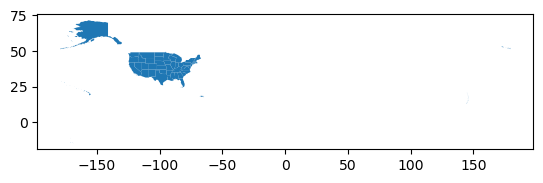

In [20]:
states.plot()

## Check-in

- What are the unique values for region, division, or state codes in the data?
- Which codes  should we select to keep only states in the contiguous US?



In [21]:
states.columns

Index(['region', 'division', 'statefp', 'statens', 'geoid', 'stusps', 'name',
       'lsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat', 'intptlon',
       'geometry'],
      dtype='object')

In [22]:
print("region:", states['region'].unique())
print("division:", states['division'].unique())
print("states:", states['statefp'].unique())

region: [3 2 1 4 9]
division: [5 3 4 1 8 9 2 7 6 0]
states: [54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


Hawaii and Alaska have codes 2, 15 and then region 9 should also be excluded

<Axes: >

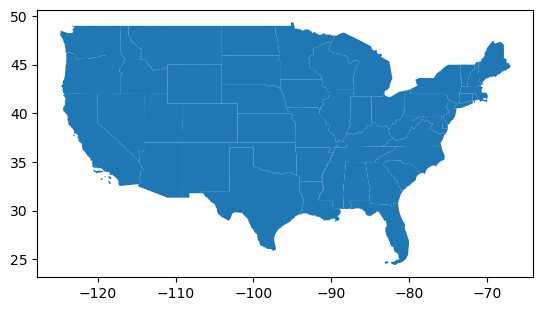

In [23]:
# Select contiguous US states
contiguous = states[ (states.region != 9 ) & (~states.statefp.isin([2,15])) ] # ~ negates the statement

contiguous.plot()

The `~` tilde symbol is used in Python to negate a statement.


## Check-in
Select the data in the `power_plants` data frame for the contiguous US states.

In [24]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)
5,11575,10,Greene County,195,Alabama Power Co,Electric Utility,Highway 43,Demopolis,Greene,Alabama,36732.0,natural gas,Natural Gas = 1256.1 MW,Natural Gas Fired Combustion Turbine; Natural ...,1288.4,1256.1,NaN,NaN,NaN,NaN,NaN,NaN,1256.1,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.781100,32.601700,POINT (-87.78110 32.60170)


# Plotting

Before plotting, check CRS!

In [25]:
contiguous.crs == power_plants.crs

False

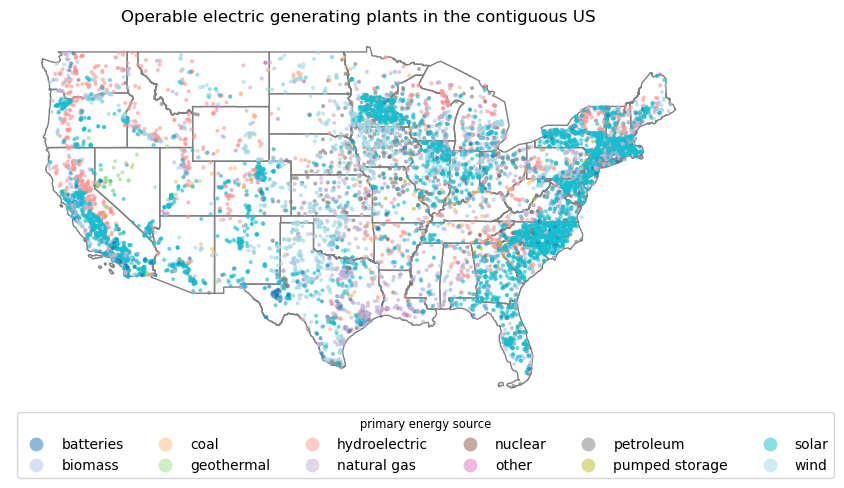

In [26]:
fig, ax  = plt.subplots(figsize=(9,5))

# Remove axis for a cleaner map
ax.axis('off')

ax.set_title('Operable electric generating plants in the contiguous US', 
            fontsize=12)

contiguous.plot(ax=ax,
               color='none',
               edgecolor='grey')

# Add electric power plants colored by energy source
power_plants.plot(ax=ax,
                 column='primsource',# color by values in this column
                 legend=True,
                 markersize=4,
                 cmap='tab20',
                 alpha=0.5,
                 legend_kwds={
                     'title': 'primary energy source',
                     'title_fontsize': 'small',
                     'loc' : 'upper left',
                     'bbox_to_anchor':(0,0),
                     'ncol':6
                 })



plt.show()

We controlled the legend location using `loc` and `bbox_toanchor` in the `legend_kwds`:
- `loc` indicates the **corner of the legend we want to use for placement**
- `bbox_to_answer` is a tuple with coordinates indicating where to place the corner specified in `loc` relative to the axes. Values between 0 and 1 are *inside* the axes.



## `for` with `zip`

Often, we need to iterate simulatenously over two lists (or iterables). 

`zip()` is a Python function that allows you to combine two lists so that you can iterate over their elements in pairs.

When used in a `for` loop, it allows you to process elements of each list together.

Example:


In [27]:
# Iterate over a single list
numbers = [1, 2, 3]

for num in numbers:
    print(num)

1
2
3


In [28]:
# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1 a
2 b
3 c


Example: with `matplotlib`.

A common situation when code gets repeated is when creating subplots.

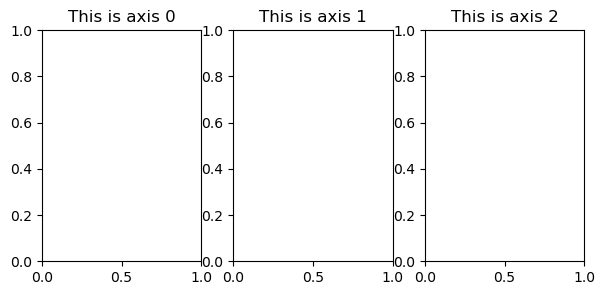

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(7,3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

## Check In
Use `for` and `zip` to create the same subplots and avoid redundancy

This is axis 0
This is axis 1
This is axis 2


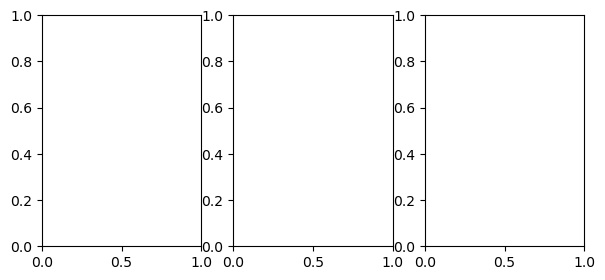

In [30]:
# My solution (wrong)
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(7,3))

i = [0, 1, 2]
j = [0, 1, 2]

for i, j in zip(i, j):
    axes[i].set_title(print(f"This is axis {j}"))

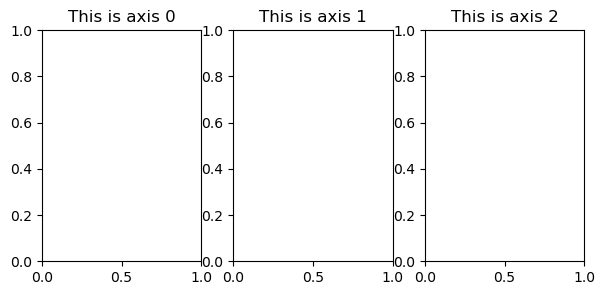

In [31]:
# Carmen's solution
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(7,3))

for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f"This is axis {i}")

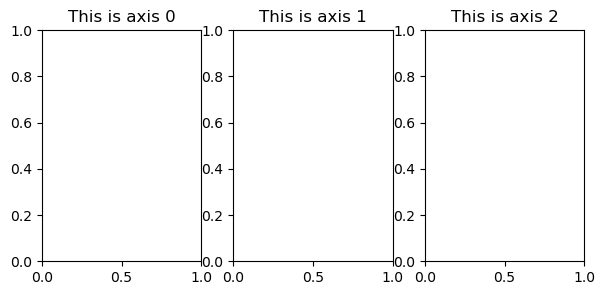

In [32]:
# Madi's solution without zip()
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(7,3))

for i in [0,1,2]:
    axes[i].set_title(f"This is axis {i}")

Remember we have been working with two datasets

In [33]:
power_plants.head(1)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)


In [34]:
states.head(1)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."


## Exercise

1. Select the power plants in California in a variable named "ca_power_plants"
2. Create a list named top_sources with California's top 3 electric primary sources
3. Isolate the California state boundary in a variable named ca_boundary
4. Recreate the following plot

In [35]:
ca_power_plants = power_plants[power_plants['state'] == "California"]

ca_power_plants.head(1)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)


In [36]:
top_sources = ca_power_plants['primsource'].value_counts().head(3)

top_sources

primsource
solar            766
natural gas      328
hydroelectric    244
Name: count, dtype: int64

<Axes: >

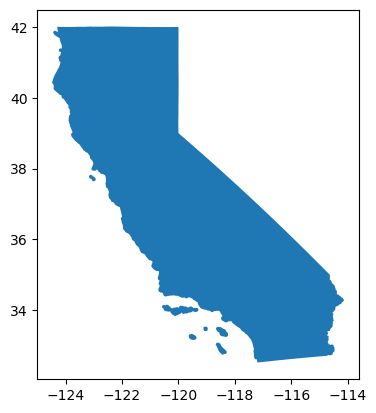

In [37]:
ca_boundary = states[states['name'] == "California"]
ca_boundary.plot()

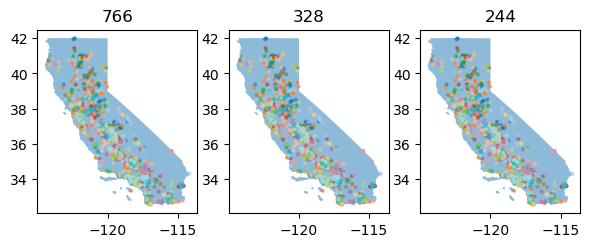

In [38]:
# My solution
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(7,3))

top_sources

for ax, i in zip(axes, top_sources):
    ax.set_title(f"{i}")
    ca_boundary.plot(ax=ax,
                 legend=True,
                 markersize=4,
                 cmap='tab20',
                 alpha=0.5
                 )
    ca_power_plants.plot(ax=ax,
                 legend=True,
                 markersize=4,
                 cmap='tab20',
                 alpha=0.5
                 )


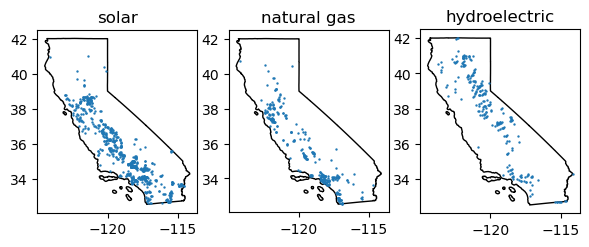

In [39]:
# Carmen's solution

ca_power_plants = power_plants[power_plants.state == "California"]

top_sources = ca_power_plants.primsource.value_counts().index[:3].tolist()

ca_boundary = states[states.name == "California"]

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(7,3))

for ax, source in zip(axes, top_sources):
    ca_boundary.plot(ax = ax,
                    color = 'none')
    # select points for the sources
    subset = ca_power_plants[ca_power_plants.primsource == source]
    
    subset.plot(ax=ax,
               markersize=0.5)
    
    ax.set_title(source)

## Functions
**functions** in Python are blocks of reusable code designed to perform specific tasks, and make your code more modular and organized.

The general syntax:

``` python

def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value # depends on the function

```

Examples:
A simple function with one-line docstring and no return values

In [40]:
def greet():
    """Print a greeting message"""
    print('Hello, welcome to the class!')

In [41]:
greet()

Hello, welcome to the class!


Example 2:
a function with a more detailed docstring and a return value

In [42]:
def circle_area(radius):
    """
    Calculate area of circle given its radius.
    
    Args: 
        radius (float): The radius of circle
    
    Returns:
        float: The area of the circle, calculated as pi * radius^2
    """
    area = 3.14159 * radius ** 2
    return area

In [43]:
help(circle_area)

Help on function circle_area in module __main__:

circle_area(radius)
    Calculate area of circle given its radius.
    
    Args: 
        radius (float): The radius of circle
    
    Returns:
        float: The area of the circle, calculated as pi * radius^2



## Example

Going back to our power_plants dataframe, let's create a function that will give us the top 3 primary energy sources for a given state

In [44]:
def top3_sources(state):
    """
    Find the top 3 electric primary sources of given state.
    
    Args:
        state (str): The US state we want information about.
        power_plants (pd.DataFrame): DataFrame containing data 
        on power plants, with at least 'state' and 'primsource' columns.
    Returns:
        list: A list of the top 3 primary sources of the state within the power_plants data frame.
    """
    state_power_plants = power_plants[power_plants.state == state]
    top_sources = state_power_plants.primsource.value_counts().index[:3].tolist()
    
    return top_sources

top3_sources('New York')

['solar', 'hydroelectric', 'natural gas']

In [45]:
def plot_3_energy_sources(state, sources, power_plants):
    
    # Raise error if there are more than three sources
    assert len(sources) == 3, 'sources must have three elements to produce the plot'

    # Isolate the state boundary and power plants
    boundary = states[states.name==state]
    state_power_plants = power_plants[power_plants['state']==state]

    # Create plot
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 3))

    for ax, source in zip(axes, sources):
        boundary.plot(ax=ax,                
                      color='none',
                      edgecolor='#362312')
        subset = state_power_plants[state_power_plants['primsource'] == source]
        subset.plot(ax=ax, markersize=5, alpha=0.5)
        ax.set_title(source)
        ax.axis('off')  # Remove axes for a cleaner look

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")
    plt.tight_layout()
    plt.show()

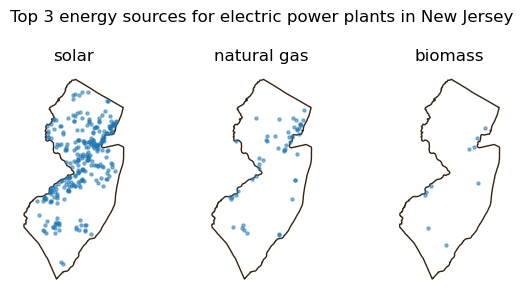

In [46]:
plot_3_energy_sources('New Jersey', 
                         top3_sources('New Jersey'),
                         power_plants)

Write a function states_with_source that takes a primary energy source (e.g., ‘solar’) and returns a list of states that use that source.

In [76]:
def states_with_source(source):
    df = power_plants[power_plants.primsource == source]
    return df.state.unique().tolist()

In [75]:
states_with_source('natural gas')

['Alabama',
 'Texas',
 'Kentucky',
 'Washington',
 'Arizona',
 'California',
 'Oklahoma',
 'Arkansas',
 'Illinois',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Indiana',
 'North Carolina',
 'Iowa',
 'Kansas',
 'Louisiana',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Dakota',
 'Ohio',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Utah',
 'Virginia',
 'Wisconsin',
 'Oregon',
 'Idaho',
 'Wyoming',
 'New Hampshire',
 'Maine',
 'West Virginia',
 'District of Columbia']